In [1]:
import plotly.express as px

from PHYS247 import DataProcessor, DataVisualizer, FeatureSelector, MLModel

In [2]:
pwd

'c:\\Users\\hamed\\OneDrive\\Hamed\\GitHub\\PHYS247'

## Clean Data

Dropped 0 duplicate records
The given dataset is larger skewed towards satified customers showing a 96.04 % observation
Remove 34 columns with constant values
Number of columns before removing the duplicates is: 337
Number of columns after removing the duplicates is: 308


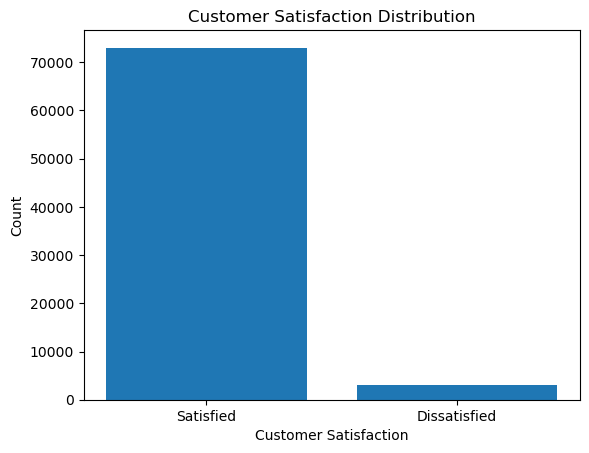

In [3]:
path = './data/train.csv'

Processor = DataProcessor(path)
Processor.clean_data()

## Split and Scale Data

In [4]:
# break up data into training and testing sets
Processor.partition_data()

# assign variables to the training and testing data  
# for future use
X_train, Y_train, X_test, Y_test = Processor.scale_features()

Train data shape: (60816, 369)
Test data shape: (15204, 369)


## Feature Selection

In [5]:
clean_df = Processor.df_clean
clean_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var25_0,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var33_0,ind_var33,ind_var34_0,ind_var37_cte,ind_var37_0,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var44_0,ind_var44,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var25_0,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var33_0,num_var33,num_var34_0,num_var35,num_var37_med_ult2,num_var37_0,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var42_0,num_var42,num_var44_0,num_var44,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_venta_var44_1y3,imp_amort_var18_ult1,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_emit_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var13_medio_ult3,num_meses_var17_ult3,num_meses_var29_ult3,num_meses_var33_ult3,num_meses_var39_vig_ult3,num_meses_var44_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var40_efec

In [6]:
len(clean_df.columns)-2

306

In [7]:
X = clean_df.drop(columns=['ID', 'TARGET'])
Y = clean_df[['TARGET']]
top_n = 20

Selector = FeatureSelector(X, Y)
Selector.random_forest_selection(n = top_n)
Selector.feature_importance_df

c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Feature,Importance
0,var38,0.384499
1,var15,0.173415
2,saldo_medio_var5_ult3,0.028729
3,saldo_medio_var5_hace3,0.027212
4,num_var45_ult3,0.020572
5,saldo_var30,0.016886
6,saldo_medio_var5_hace2,0.016705
7,num_var45_hace3,0.016380
8,saldo_var42,0.014672
9,num_var45_hace2,0.014496


In [9]:
fig = px.bar(Selector.feature_importance_df, x='Importance', y='Feature', orientation='h',
             title=f'Top {top_n} Feature Importances',
             labels={'Importance': 'Importance', 'Feature': 'Feature'})

# sort from most to least important
fig.update_yaxes(categoryorder='total ascending')

fig.show()

In [10]:
# redo the data splitting with the selected features
feature_cols = Selector.feature_importance_df['Feature'].values

X = clean_df[feature_cols]
Y = clean_df[['TARGET']]

Processor.partition_data(X, Y)

X_train = Processor.X_train
Y_train = Processor.Y_train
X_test = Processor.X_test
Y_test = Processor.Y_test

Train data shape: (60816, 20)
Test data shape: (15204, 20)


## Train Models

In [11]:
# train the models
ml_model = MLModel(X_train, Y_train, X_test, Y_test)

ml_model.logistic_regression()
ml_model.random_forest()
ml_model.decision_tree()
ml_model.svm()
ml_model.xgboost()
ml_model.neural_network()

c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Assessing logistic_regression model


c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

Assessing random_forest model
Assessing decision_tree model


c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Assessing svm model


c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\hamed\miniconda3\envs\hamed\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

TypeError: 'collections.defaultdict' object is not callable

In [13]:
import pandas as pd


data = dict(ml_model.model_performance)
df = pd.DataFrame(data)
df

,logistic_regression,random_forest,decision_tree,svm
y_true,TARGET 50595 0 5252 0 2195...,TARGET 50595 0 5252 0 2195...,TARGET 50595 0 5252 0 2195...,TARGET 50595 0 5252 0 2195...
prediction,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
accuracy,0.960076,0.952841,0.931334,0.960076
precision,0.0,0.147436,0.134003,0.0
recall,0.0,0.037891,0.131796,0.0
f1,0.0,0.060288,0.13289,0.0
roc_auc,0.5,0.51439,0.548189,0.5
log_loss,1.438996,1.69977,2.474979,1.438996
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


## Evaluate Models